In [84]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df = pd.read_csv(
    'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
# 1. Check for missing values and zeros
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [87]:
# Check for zeros in specific columns (like SkinThickness, Insulin)
print("\nZero values in each column:")
print((df == 0).sum())


Zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [88]:
# Impute missing values or zeros in columns where they make sense (e.g., replace 0 in Insulin, SkinThickness with the median)
# We'll use SimpleImputer to fill missing/zero values with the median
imputer = SimpleImputer(strategy='median')

In [89]:
# Apply imputation to relevant columns
df[['Insulin', 'SkinThickness']] = imputer.fit_transform(df[['Insulin', 'SkinThickness']])

In [90]:
# Replace zero values in relevant columns (like Insulin, SkinThickness) with NaN and then impute them
df.loc[df['Insulin'] == 0, 'Insulin'] = None
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = None

In [91]:
df[['Insulin', 'SkinThickness']] = imputer.fit_transform(df[['Insulin', 'SkinThickness']])

In [92]:
# 2. Normalize/Scale numerical columns using StandardScaler
scaler = StandardScaler()


In [93]:
# Select columns to normalize (all columns except Outcome)
numerical_columns = df.drop('Outcome', axis=1).columns

In [94]:
# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



In [95]:
# Display the first few rows after preprocessing
print("\nFirst 5 rows after preprocessing:")
print(df.head())


First 5 rows after preprocessing:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.670643 -0.181541  0.204013   
1    -0.844885 -1.123396      -0.160546      -0.012301 -0.181541 -0.684422   
2     1.233880  1.943724      -0.263941      -0.012301 -0.181541 -1.103255   
3    -0.844885 -0.998208      -0.160546      -0.695245 -0.540642 -0.494043   
4    -1.141852  0.504055      -1.504687       0.670643  0.316566  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [96]:
# 1. Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())




Summary statistics of the dataset:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.590520e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.000

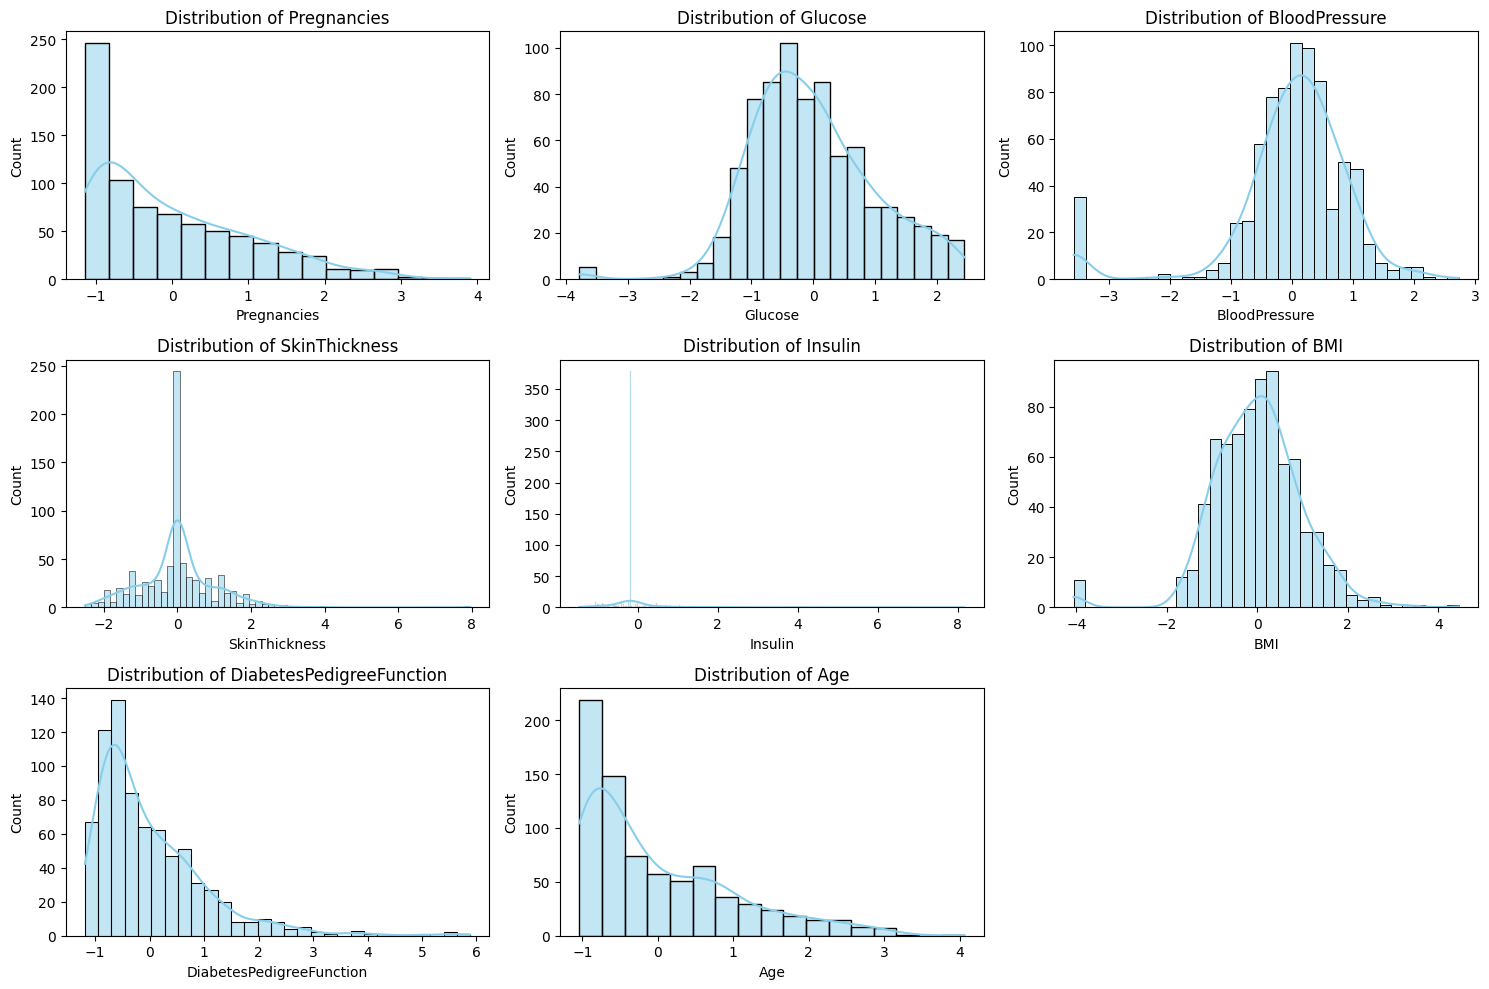

In [97]:
# 2. Distribution of numerical features
plt.figure(figsize=(15, 10))

# Plot distributions of key numerical columns
numerical_columns = df.drop('Outcome', axis=1).columns
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



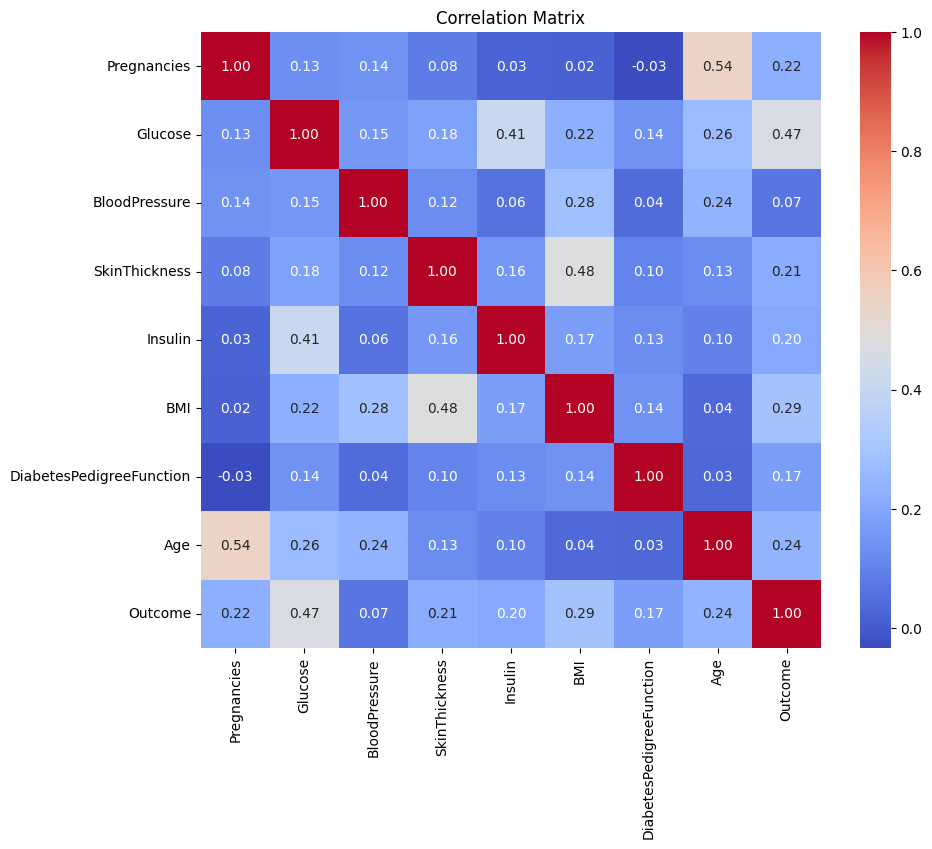

In [98]:
#Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()



In [99]:
# 1. Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [100]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions
logreg_y_pred = logreg.predict(X_test)

# Evaluation Metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print(f"AUC-ROC: {logreg_auc:.4f}")


Logistic Regression Metrics:
Accuracy: 0.7597
Precision: 0.6607
Recall: 0.6727
F1 Score: 0.6667
AUC-ROC: 0.8163


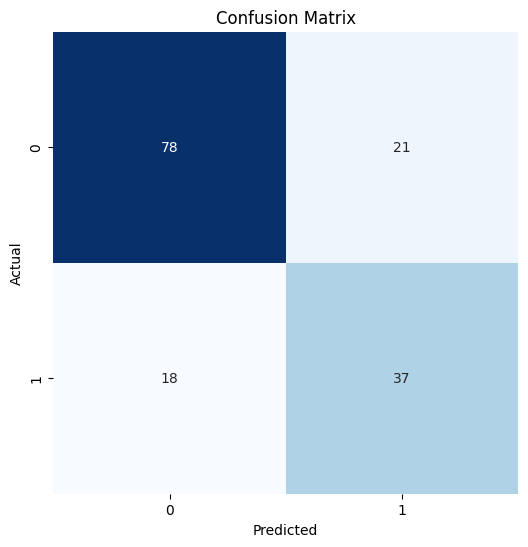

In [102]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [103]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")


Random Forest Metrics:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
AUC-ROC: 0.8316


In [104]:
# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluation Metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")
print(f"AUC-ROC: {xgb_roc_auc:.4f}")


XGBoost Metrics:
Accuracy: 0.7208
Precision: 0.5938
Recall: 0.6909
F1 Score: 0.6387
AUC-ROC: 0.7807


In [105]:
# Comparison of models' performance metrics
models = {
    "Logistic Regression": (logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_auc),
    "Random Forest": (rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc),
    "XGBoost": (xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc)
}

# Print metrics for each model
for model_name, metrics in models.items():
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {metrics[0]:.4f}")
    print(f"Precision: {metrics[1]:.4f}")
    print(f"Recall: {metrics[2]:.4f}")
    print(f"F1 Score: {metrics[3]:.4f}")
    print(f"AUC-ROC: {metrics[4]:.4f}\n")


Logistic Regression Metrics:
Accuracy: 0.7597
Precision: 0.6607
Recall: 0.6727
F1 Score: 0.6667
AUC-ROC: 0.8163

Random Forest Metrics:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
AUC-ROC: 0.8316

XGBoost Metrics:
Accuracy: 0.7208
Precision: 0.5938
Recall: 0.6909
F1 Score: 0.6387
AUC-ROC: 0.7807



In [106]:
# Cross-validation for the tuned XGBoost model
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores (Accuracy):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores (Accuracy): [0.79674797 0.81300813 0.78861789 0.72357724 0.77868852]
Mean Accuracy: 0.7801279488204719
Standard Deviation: 0.03042849146668807


In [107]:
# Hyperparameter Tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# Use best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions with best model
xgb_y_pred_best = best_xgb.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, xgb_y_pred_best)
precision = precision_score(y_test, xgb_y_pred_best)
recall = recall_score(y_test, xgb_y_pred_best)
f1 = f1_score(y_test, xgb_y_pred_best)
roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Print the metrics for the best XGBoost model
print(f"Best XGBoost Model Metrics:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsampl

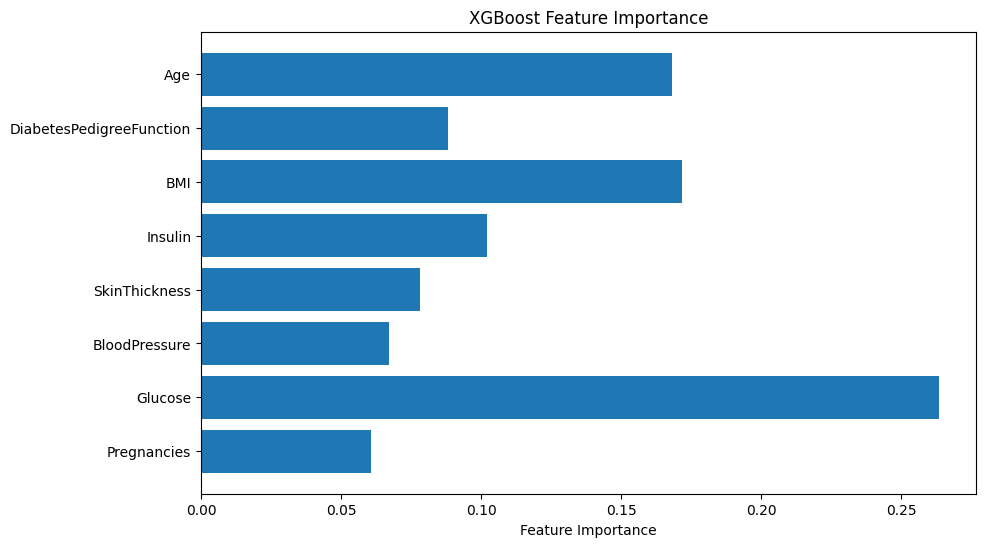

In [108]:
# If you'd like to interpret the XGBoost model's results, you can visualize feature importances:
import xgboost
xgb_feature_importances = best_xgb.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_feature_importances)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# Next step would be deployment or interpreting the model further using SHAP or LIME


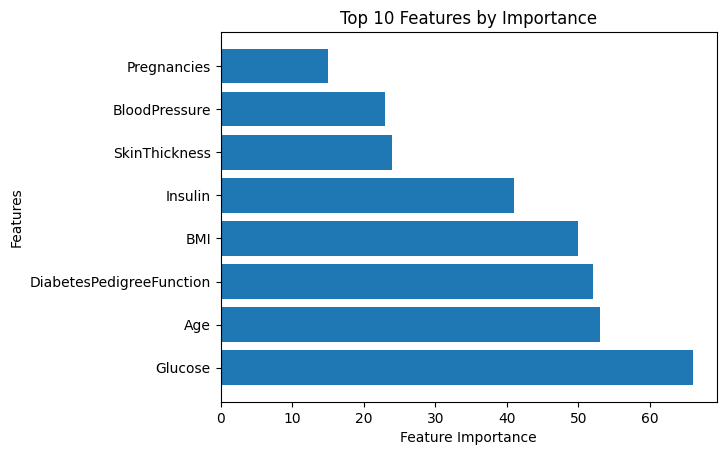

In [109]:
# Get feature importances
importance = best_xgb.get_booster().get_score(importance_type='weight')

# Convert the importance dictionary to a sorted list
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot feature importance
features, scores = zip(*importance)
plt.barh(features, scores)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features by Importance')
plt.show()


In [110]:
from sklearn.model_selection import cross_val_score

# Cross-validate the best XGBoost model
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.79674797 0.81300813 0.78861789 0.72357724 0.77868852]
Mean Cross-Validation Accuracy: 0.7801279488204719


In [111]:
# Train the final XGBoost model
final_xgb_model = XGBClassifier(**grid_search.best_params_, random_state=42)
final_xgb_model.fit(X_train, y_train)

# Evaluate the final model
final_xgb_predictions = final_xgb_model.predict(X_test)
final_xgb_accuracy = accuracy_score(y_test, final_xgb_predictions)

print(f"Final XGBoost Accuracy: {final_xgb_accuracy:.4f}")


Final XGBoost Accuracy: 0.7597


In [112]:
import joblib

# Save the model
joblib.dump(final_xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']